<a href="https://colab.research.google.com/github/KPorus/machine-learning-and-python/blob/main/Weather(Preactice_problem).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import io
import pandas as pd

In [2]:
uploaded = files.upload()

Saving seattle-weather.csv to seattle-weather.csv


In [85]:
df = pd.read_csv(io.BytesIO(uploaded['seattle-weather.csv']))
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
df.shape

(1461, 6)

In [86]:
df_fitter = df[(df["weather"]!="drizzle") & (df["weather"]!="snow")] # Add parentheses to ensure the comparisons are done before the or operation.
df_fitter.shape

(1382, 6)

In [87]:
df_fitter.head()

,date,precipitation,temp_max,temp_min,wind,weather
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain


In [88]:
df_fitter.dropna(inplace=True)
df_fitter.shape

<ipython-input-88-41a054575e00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitter.dropna(inplace=True)


(1382, 6)

In [89]:
df_fitter['weather'] = df_fitter['weather'].replace({'rain': 1, 'sun': 2, 'fog': 3})
df_fitter.head()

<ipython-input-89-ff9502cd9f75>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_fitter['weather'] = df_fitter['weather'].replace({'rain': 1, 'sun': 2, 'fog': 3})
<ipython-input-89-ff9502cd9f75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitter['weather'] = df_fitter['weather'].replace({'rain': 1, 'sun': 2, 'fog': 3})


,date,precipitation,temp_max,temp_min,wind,weather
1,2012-01-02,10.9,10.6,2.8,4.5,1
2,2012-01-03,0.8,11.7,7.2,2.3,1
3,2012-01-04,20.3,12.2,5.6,4.7,1
4,2012-01-05,1.3,8.9,2.8,6.1,1
5,2012-01-06,2.5,4.4,2.2,2.2,1


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

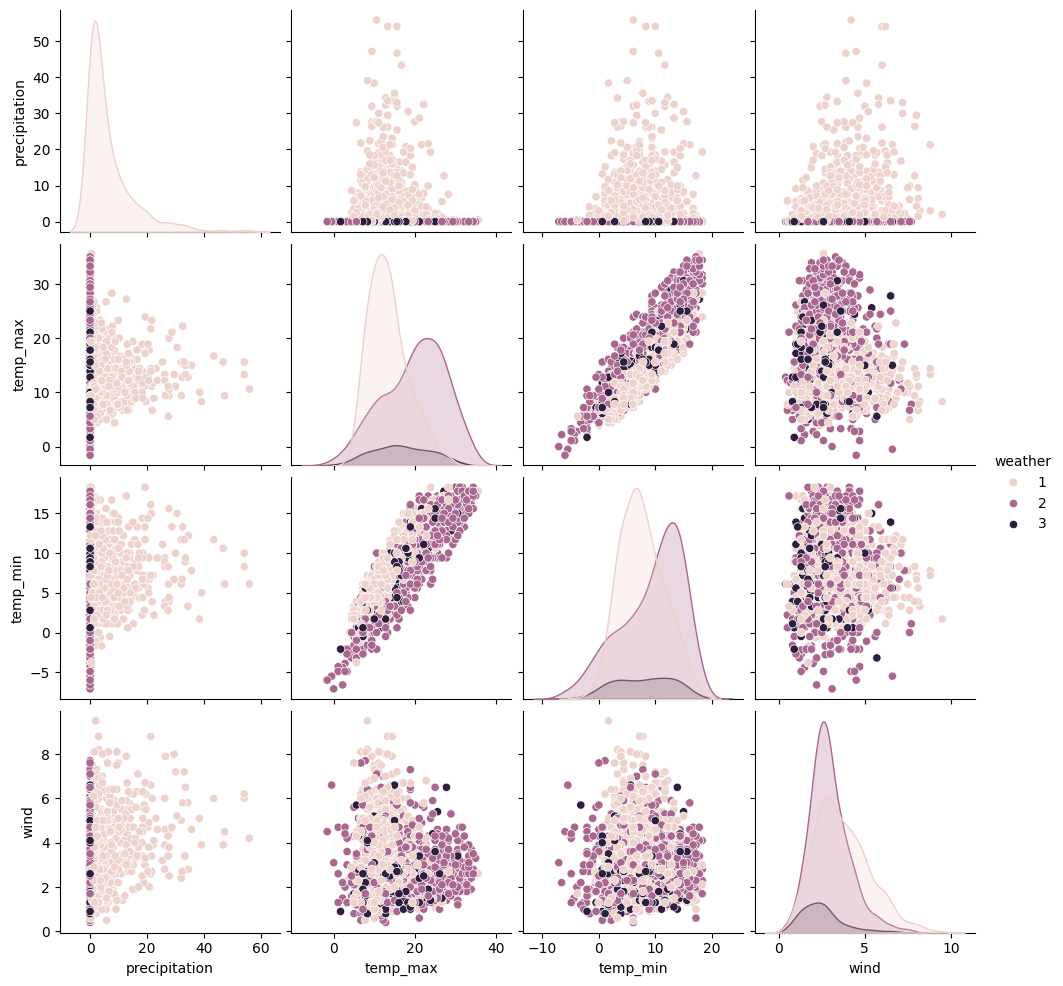

In [82]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.pairplot(df_fitter.drop('date',axis='columns'), hue='weather')
plt.show()

In [90]:
df_fitter.drop('date',axis='columns',inplace=True)
df_fitter.head()

<ipython-input-90-1327b3511449>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitter.drop('date',axis='columns',inplace=True)


,precipitation,temp_max,temp_min,wind,weather
1,10.9,10.6,2.8,4.5,1
2,0.8,11.7,7.2,2.3,1
3,20.3,12.2,5.6,4.7,1
4,1.3,8.9,2.8,6.1,1
5,2.5,4.4,2.2,2.2,1


In [84]:
# df_fitter.drop('precipitation',axis='columns',inplace=True)

<ipython-input-84-4e3929eb1ed0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitter.drop('precipitation',axis='columns',inplace=True)


In [93]:
print(df_fitter['precipitation'].max(), df_fitter['precipitation'].min())

55.9 0.0


In [91]:
# Define bins and labels
bins = [-float('inf'), 10, 25, float('inf')]
labels = ['Cold', 'Moderate', 'Hot']

# Create a new column with categorized temp_max
df_fitter['temp_max_category'] = pd.cut(df_fitter['temp_max'], bins=bins, labels=labels)

# Define bins and labels for temp_min
min_bins = [-float('inf'), 5, 15, float('inf')]
min_labels = ['Very Cold', 'Cool', 'Mild']

# Create a new column with categorized temp_min
df_fitter['temp_min_category'] = pd.cut(df_fitter['temp_min'], bins=min_bins, labels=min_labels)

# Drop the original columns
df_fitter.drop(['temp_max', 'temp_min'], axis=1, inplace=True)

# Print the updated DataFrame
df_fitter.head()

<ipython-input-91-aab4680cf2d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitter['temp_max_category'] = pd.cut(df_fitter['temp_max'], bins=bins, labels=labels)
<ipython-input-91-aab4680cf2d5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitter['temp_min_category'] = pd.cut(df_fitter['temp_min'], bins=min_bins, labels=min_labels)
<ipython-input-91-aab4680cf2d5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

,precipitation,wind,weather,temp_max_category,temp_min_category
1,10.9,4.5,1,Moderate,Very Cold
2,0.8,2.3,1,Moderate,Cool
3,20.3,4.7,1,Moderate,Cool
4,1.3,6.1,1,Cold,Very Cold
5,2.5,2.2,1,Cold,Very Cold


In [94]:
# Define bins and labels for wind
wind_bins = [-float('inf'), 2, 5, float('inf')]
wind_labels = ['Low Wind', 'Moderate Wind', 'High Wind']

# Create a new column with categorized wind
df_fitter['wind_category'] = pd.cut(df_fitter['wind'], bins=wind_bins, labels=wind_labels)

# Define bins and labels for precipitation
precip_bins = [-float('inf'), 0, 2, 10, float('inf')]
precip_labels = ['No Precipitation', 'Light Precipitation', 'Moderate Precipitation', 'Heavy Precipitation']

# Create a new column with categorized precipitation
df_fitter['precipitation_category'] = pd.cut(df_fitter['precipitation'], bins=precip_bins, labels=precip_labels)


# Drop the original columns
df_fitter.drop(['wind','precipitation'], axis=1, inplace=True)

df_fitter.head()

<ipython-input-94-f7407c903d5f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitter['wind_category'] = pd.cut(df_fitter['wind'], bins=wind_bins, labels=wind_labels)
<ipython-input-94-f7407c903d5f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitter['precipitation_category'] = pd.cut(df_fitter['precipitation'], bins=precip_bins, labels=precip_labels)
<ipython-input-94-f7407c903d5f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

,weather,temp_max_category,temp_min_category,wind_category,precipitation_category
1,1,Moderate,Very Cold,Moderate Wind,Heavy Precipitation
2,1,Moderate,Cool,Moderate Wind,Light Precipitation
3,1,Moderate,Cool,Moderate Wind,Heavy Precipitation
4,1,Cold,Very Cold,High Wind,Light Precipitation
5,1,Cold,Very Cold,Moderate Wind,Moderate Precipitation


In [95]:
df_fitter.isnull().sum()

,0
weather,0
temp_max_category,0
temp_min_category,0
wind_category,0
precipitation_category,0


In [96]:
df_fitter['wind_category'] = df_fitter['wind_category'].map({ 'Low Wind':1, 'Moderate Wind':2, 'High Wind':3})
df_fitter['temp_min_category'] = df_fitter['temp_min_category'].map({ 'Very Cold':1, 'Cool':2, 'Mild':3})
df_fitter['temp_max_category'] = df_fitter['temp_max_category'].map({ 'Cold':1, 'Moderate':2, 'Hot':3})
df_fitter['precipitation_category'] = df_fitter['precipitation_category'].map({ 'No Precipitation':1, 'Light Precipitation':2, 'Moderate Precipitation':3, 'Heavy Precipitation':4})

df_fitter.head()

<ipython-input-96-82ca6baa2d62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitter['wind_category'] = df_fitter['wind_category'].map({ 'Low Wind':1, 'Moderate Wind':2, 'High Wind':3})
<ipython-input-96-82ca6baa2d62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitter['temp_min_category'] = df_fitter['temp_min_category'].map({ 'Very Cold':1, 'Cool':2, 'Mild':3})
<ipython-input-96-82ca6baa2d62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,weather,temp_max_category,temp_min_category,wind_category,precipitation_category
1,1,2,1,2,4
2,1,2,2,2,2
3,1,2,2,2,4
4,1,1,1,3,2
5,1,1,1,2,3


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# from sklearn.metrics import mean_squared_error, r2_score

#Data split

In [98]:
x_train, x_test, y_train, y_test = train_test_split(df_fitter.drop('weather', axis=1), df_fitter['weather'], test_size=0.2, random_state=42)

#polynomial

In [114]:
pmodel = PolynomialFeatures(degree=4)
x_train_poly = pmodel.fit_transform(x_train)
x_test_poly = pmodel.transform(x_test)

#LogisticRegression

In [115]:
lr = LogisticRegression()
lr.fit(x_train_poly, y_train)
lr.score(x_train_poly, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9004524886877828

In [116]:
lr.score(x_test_poly, y_test)

0.8772563176895307

#Decision Tree

In [160]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report
from sklearn.tree import DecisionTreeClassifier

dec = DecisionTreeClassifier(splitter='best', criterion='entropy')
dec.fit(x_train_poly, y_train)
dec.score(x_train_poly, y_train)

0.9013574660633484

In [161]:
dec.score(x_test_poly, y_test)

0.8736462093862816

#accuracy, precision,recall,f1_score

In [195]:
from logging import log
dec_pred = dec.predict(x_test_poly)
dec_accuracy = accuracy_score(y_test, dec_pred)
# Set the 'average' parameter to a suitable value for multiclass classification
# Options include: 'micro', 'macro', 'weighted', or None.
# Choosing 'weighted' to calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).
dec_precision = precision_score(y_test, dec_pred, average='weighted')
dec_recall = recall_score(y_test, dec_pred, average='weighted')
dec_f1 = f1_score(y_test, dec_pred, average='weighted')

logis_pred = lr.predict(x_test_poly)
logis_accuracy = accuracy_score(y_test, logis_pred)
logis_precision = precision_score(y_test, logis_pred, average='weighted')
logis_recall = recall_score(y_test, logis_pred, average='weighted')
logis_f1 = f1_score(y_test, logis_pred, average='weighted')

print('Decision tree Accuracy:', dec_accuracy)
print('Decision tree Precision:', dec_precision)
print('Decision tree Recall:', dec_recall)
print('Decision tree F1 Score:', dec_f1)
print('\n\n\n')
print('Logistic Regression Accuracy:', logis_accuracy)
print('Logistic Regression Precision:', logis_precision)
print('Logistic Regression Recall:', logis_recall)
print('Logistic Regression F1 Score:', logis_f1)

Decision tree Accuracy: 0.8736462093862816
Decision tree Precision: 0.8239631945055913
Decision tree Recall: 0.8736462093862816
Decision tree F1 Score: 0.8432019591127755




Logistic Regression Accuracy: 0.8772563176895307
Logistic Regression Precision: 0.8245487364620939
Logistic Regression Recall: 0.8772563176895307
Logistic Regression F1 Score: 0.8450030566907734


#using Lasso (L1)

In [168]:
L1 = Lasso(alpha=0.0001)
L1.fit(x_train_poly, y_train)
L1.score(x_train_poly, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.379e+01, tolerance: 4.228e-02
  model = cd_fast.enet_coordinate_descent(


0.7474788156072601

In [169]:
L1.score(x_test_poly, y_test)

0.7014914062066864

#Polyminal with Ridge

In [175]:
L2 = Ridge(alpha=0.001,tol=0.1)
L2.fit(x_train_poly, y_train)
L2.score(x_train_poly, y_train)

0.7599831383047377

In [176]:
L2.score(x_test_poly, y_test)

0.6965737524593876

#KNN

In [192]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [190]:
n = KNeighborsRegressor(n_neighbors=50,p=3)
n.fit(x_train, y_train)
n.score(x_train, y_train)

0.734142473083756

In [191]:
n.score(x_test, y_test)

0.6986327489293361

In [188]:
n1 = KNeighborsClassifier(n_neighbors=30,p=2)
n1.fit(x_train_poly, y_train)
n1.score(x_train_poly, y_train)

0.8832579185520362

In [189]:
n.score(x_test,y_test)

0.6996957809154175